In [1]:
from panel_segmentation import panel_detection as pseg
import numpy as np
from tensorflow.keras.preprocessing import image as imagex
import matplotlib.pyplot as plt
import os

#Set the current working directory as the /examples/ folder. 
os.getcwd()

'c:\\Users\\kperry\\source\\repos\\Panel-Segmentation'

# Run a system through the Panel-Segmentation detection pipeline

Use a set of latitude-longitude coordinates for an NREL site.

In [25]:
#Example latitude-longitude coordinates to run the analysis on.
latitude = 39.7407
longitude = -105.1694    
google_maps_api_key =  "YOUR API KEY HERE"     
file_name_save = "./panel_segmentation/examples/Panel_Detection_Examples/sat_img_ex.png"

Create an instance of the PanelDetection class and generate a satellite image of the site at the lat-long coordinates. 

C:\Users\kperry\AppData\Roaming\Python\Python38\site-packages\urllib3\connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


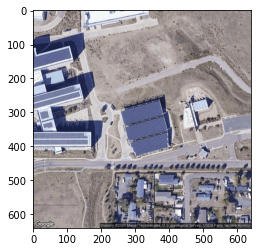

In [26]:
#CREATE AN INSTANCE OF THE PANELDETECTION CLASS TO RUN THE ANALYSIS
panelseg = pseg.PanelDetection(model_file_path ='./panel_segmentation/VGG16Net_ConvTranpose_complete.h5', 
                               classifier_file_path ='./panel_segmentation/VGG16_classification_model.h5')

#GENERATE A SATELLITE IMAGE USING THE ASSOCIATED LAT-LONG COORDS AND THE GOOGLE
#MAPS API KEY
img = panelseg.generateSatelliteImage(latitude, longitude,
                                      file_name_save,
                                      google_maps_api_key)
#Show the generated satellite image
plt.imshow(img)

In [27]:
#CREATE AN INSTANCE OF THE PANELDETECTION CLASS TO RUN THE ANALYSIS
panelseg = pseg.PanelDetection(model_file_path ='./panel_segmentation/VGG16Net_ConvTranpose_complete.h5', 
                               classifier_file_path ='./panel_segmentation/VGG16_classification_model.h5')


Load in the image and declare it as a numpy array.

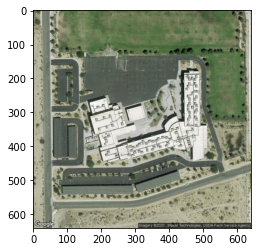

In [31]:
x = imagex.load_img("./panel_segmentation/examples/Panel_Detection_Examples/sat_img.png", 
                        color_mode='rgb', 
                        target_size=(640,640))
plt.imshow(x)
x = np.array(x)

Use the classifier model to confirm if there are solar arrays detected in the satellite image.

In [32]:
panel_loc = panelseg.hasPanels(x)
print(panel_loc)

True


First, mask the satellite image, and then crop out the panels.

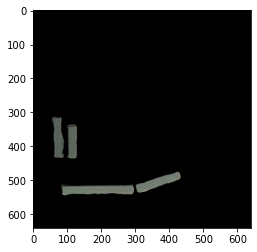

In [33]:
#Mask the satellite image
res = panelseg.testSingle(x.astype(float), test_mask=None,  model =None)    
#Use the mask to isolate the panels
new_res = panelseg.cropPanels(x, res)
plt.imshow(new_res.reshape(640,640,3))

0.0074267578125
0.006310221354166667
0.008138834635416667
0.013583170572916666


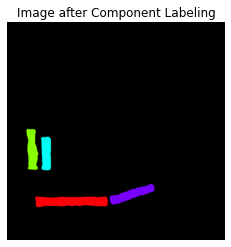

In [34]:
import cv2
rest = cv2.cvtColor(res,cv2.COLOR_GRAY2RGB)
#Cluster the solar arrays in the image using connected components clustering.
n,clusters = panelseg.clusterPanels(new_res,                                       
                                  fig=True)


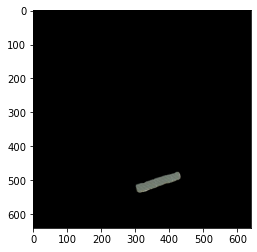

In [35]:
plt.imshow(clusters[2])

90.0
91.0
161.0
179.0


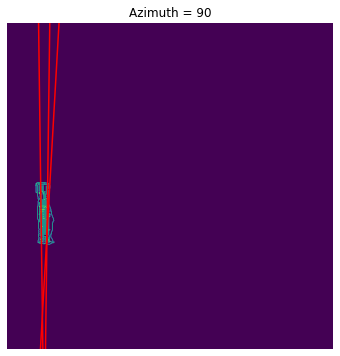

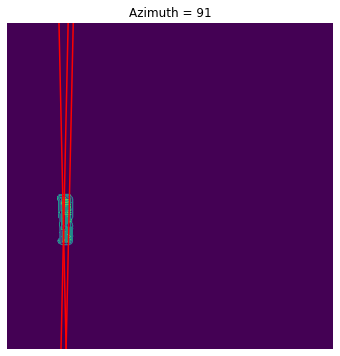

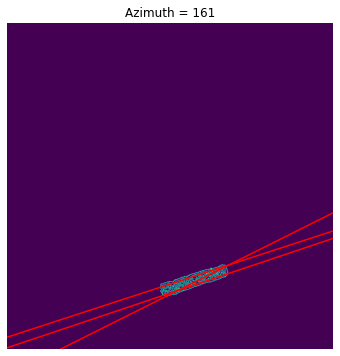

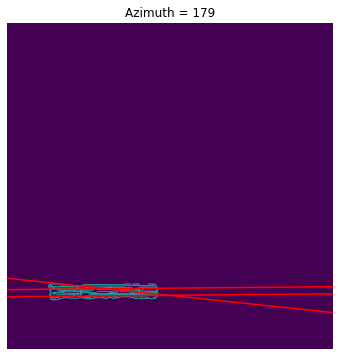

In [36]:

#Calculate the azimuth for each cluster
for ii in np.arange(clusters.shape[0]):
        az = panelseg.detectAzimuth(clusters[ii][np.newaxis,:])
        print(az)
        
#Plot the azimuth estimate for each cluster
panelseg.plotEdgeAz(clusters, 3, 1,                         
                    save_img_file_path = './panel_segmentation/examples/Panel_Detection_Examples/')

Estimate the azimuth, assuming there is only one solar array detected in the image.

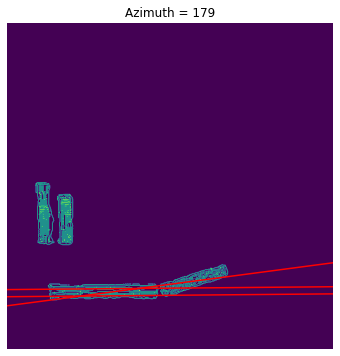

In [37]:
#check azimuth 
az = panelseg.detectAzimuth(new_res)
    
#plot edges + azimuth 
panelseg.plotEdgeAz(new_res,3, 1,                         
                    save_img_file_path = './')

There are multiple solar arrays in the image though (approximately 5), so the above estimate isn't accurate. In order to estimate the azimuth for each individual solar array in the image, we perform connected components clustering on the masked image.